In [329]:
import pandas as pd
from ta import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

In [331]:
#load data
df = pd.read_csv('#',index_col=0)
# Clean NaN values
df = utils.dropna(df)
# Add ta features filling NaN values
df = add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume", fillna=True)

In [332]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2008-03-19,14.875000,17.250000,13.7500,14.1250,11.215883,708486000,-5.564052e+08,0.0,-0.785714,0.0,...,0.000000,-100.000000,0.862397,10.714286,10.714286,-89.285714,0.0,-75.320383,0.000000,0.000000
2008-03-20,14.600000,16.250000,14.3750,16.0875,12.774192,198985200,-3.921731e+08,198985200.0,-0.432160,0.0,...,22.525088,-96.780991,5.125145,66.785714,38.750000,-33.214286,0.0,13.893805,13.009630,13.893805
2008-03-24,16.809999,16.924999,14.7500,14.9325,11.857074,149566400,4.002769e+07,49418800.0,-0.488762,-451327577.0,...,19.269862,-95.638611,5.273791,33.785714,37.095238,-66.214286,0.0,-7.179487,-7.450253,5.716814
2008-03-25,15.145000,16.062500,14.9550,15.8125,12.555830,87092000,-7.669393e+07,136510800.0,-0.409802,30770630.0,...,25.563652,-94.441088,6.951051,58.928571,53.166667,-41.071429,0.0,5.893186,5.726072,11.946903
2008-03-26,15.682500,16.120001,15.3925,15.9900,12.696774,43111600,7.547673e+07,179622400.0,-0.371587,-112575951.0,...,28.367751,-93.575683,8.052825,64.000000,52.238095,-36.000000,0.0,1.122530,1.116276,13.203540


# Bollinger Band

In [333]:
# Add bollinger band high indicator filling NaN values
df['bb_high_indicator'] = bollinger_hband_indicator(df["Close"], n=20, ndev=2, fillna=True)

# Add bollinger band low indicator filling NaN values
df['bb_low_indicator'] = bollinger_lband_indicator(df["Close"], n=20, ndev=2, fillna=True)

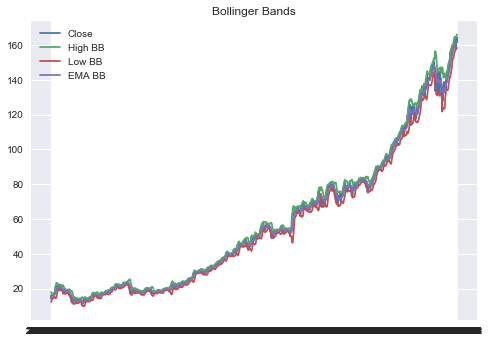

In [334]:
plt.plot(df.Close)
plt.plot(df.volatility_bbh, label='High BB')
plt.plot(df.volatility_bbl, label='Low BB')
plt.plot(df.volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

# MACD

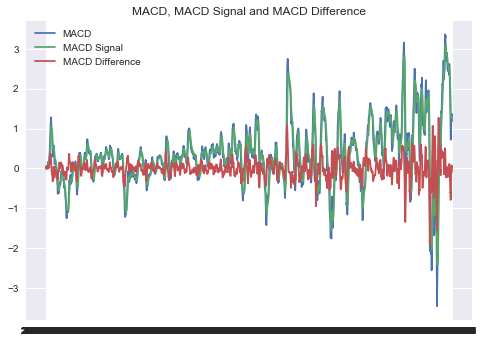

In [335]:
plt.plot(df.trend_macd, label='MACD')
plt.plot(df.trend_macd_signal, label='MACD Signal')
plt.plot(df.trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()

In [336]:
df.tail(100)

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,others_dr,others_dlr,others_cr,bb_high_indicator,bb_low_indicator
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,131.679993,132.440002,130.229996,131.940002,131.507858,7976000,1.757413e+06,2.006726e+09,-0.107609,2.034697e+05,...,51.243667,53.630707,50.926982,-46.369293,-7.445089,0.763709,0.760807,834.088510,0.0,0.0
2019-01-02,130.000000,133.740005,129.600006,132.919998,132.484634,8788000,9.673693e+06,2.015514e+09,-0.119101,2.785260e+06,...,56.200444,58.713672,53.596122,-41.286328,-5.445176,0.742759,0.740014,841.026535,0.0,0.0
2019-01-03,131.210007,131.279999,127.879997,128.130005,127.710335,9425900,-2.732962e+06,2.006088e+09,-0.162594,-5.524115e+06,...,55.927059,37.250453,49.864944,-62.749547,-4.505383,-3.603666,-3.670202,807.115080,0.0,0.0
2019-01-04,130.440002,134.589996,130.130005,133.649994,133.212250,11065800,-1.638422e+06,2.017154e+09,-0.084578,1.662785e+06,...,63.021331,79.695725,58.553283,-20.304275,-3.648294,4.308116,4.217899,846.194648,0.0,0.0
2019-01-07,134.449997,137.169998,134.039993,136.059998,135.614349,12928000,1.015991e+07,2.030082e+09,-0.136664,2.777163e+07,...,59.269102,92.870906,69.939028,-7.129094,-2.711177,1.803220,1.787155,863.256623,0.0,0.0
2019-01-08,137.970001,138.190002,135.960007,136.800003,136.351944,9243000,1.478953e+06,2.039325e+09,-0.111643,-5.741836e+06,...,54.377227,91.621467,88.062699,-8.378533,-1.479499,0.543881,0.542408,868.495596,0.0,0.0
2019-01-09,138.300003,139.479996,137.619995,138.410004,137.956665,9987600,-3.783099e+06,2.049313e+09,-0.173049,-6.909958e+06,...,56.765349,94.015704,92.836025,-5.984296,-0.034972,1.176901,1.170030,879.893834,0.0,0.0
2019-01-10,136.809998,138.820007,136.360001,138.669998,138.215805,12514900,9.485187e+06,2.061828e+09,-0.095323,6.118437e+06,...,58.776712,95.469809,93.702327,-4.530191,1.561735,0.187843,0.187667,881.734499,0.0,0.0
2019-01-11,137.750000,138.600006,137.410004,138.059998,137.607803,5860100,1.153022e+07,2.055968e+09,-0.050781,1.444650e+06,...,57.250039,92.058176,93.847896,-7.941824,2.515148,-0.439893,-0.440864,877.415915,0.0,0.0


# RSI - Relative Strength Index

In [337]:
df['momentum_rsi'] = rsi(df['Close'], n=14, fillna=True)

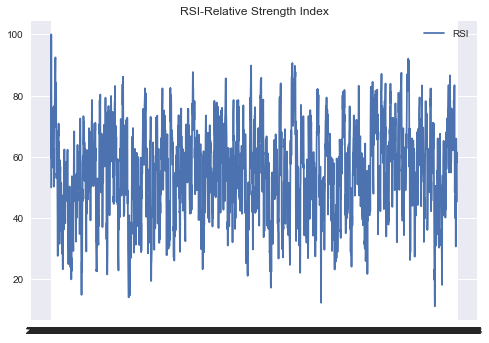

In [338]:
plt.plot(df.momentum_rsi, label='RSI')
plt.title('RSI-Relative Strength Index')
plt.legend()
plt.show()

# Returns

In [340]:
df['log_returns'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
df =df.fillna(0)

In [341]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2815 entries, 2008-03-19 to 2019-05-23
Data columns (total 67 columns):
Open                       2815 non-null float64
High                       2815 non-null float64
Low                        2815 non-null float64
Close                      2815 non-null float64
Adj Close                  2815 non-null float64
Volume                     2815 non-null int64
volume_adi                 2815 non-null float64
volume_obv                 2815 non-null float64
volume_cmf                 2815 non-null float64
volume_fi                  2815 non-null float64
volume_em                  2815 non-null float64
volume_vpt                 2815 non-null float64
volume_nvi                 2815 non-null float64
volatility_atr             2815 non-null float64
volatility_bbh             2815 non-null float64
volatility_bbl             2815 non-null float64
volatility_bbm             2815 non-null float64
volatility_bbhi            2815 non-null float64
vol

# Long & Short Signals

In [342]:
def get_long_short(df):
    
    bb_high = df['volatility_bbh']
    bb_low = df['volatility_bbl']
    rsi = df['momentum_rsi']
    macd_diff = df['trend_macd_diff']
    close = df['Close']
    
    #short_sig = (close > bb_high).astype(np.int) * -1
    long_sig_1 = (close <= XX*bb_low).astype(np.int)
    long_sig_2 = (rsi<=XX).astype(np.int)
    long_sig_3 = (macd_diff<=XX).astype(np.int)
    long_short = long_sig_1*long_sig_2*long_sig_3
    
    return long_short

In [343]:
signal = get_long_short(df)

In [344]:
signal.describe()

count    2815.000000
mean        0.146714
std         0.353883
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

# Return

In [345]:
def get_lookahead_prices(close, lookahead_days):
    return close.shift(-1*lookahead_days)

In [346]:
lookahead_1 = get_lookahead_prices(df['Close'], 1)

In [347]:
def get_return_lookahead(close, lookahead_prices):
    return np.log(lookahead_prices) - np.log(close)

In [348]:
price_return_1 = get_return_lookahead(df['Close'], lookahead_1)

In [349]:
def get_signal_return(signal, lookahead_returns):    
    return signal * lookahead_returns

In [350]:
signal_return_1 = get_signal_return(signal, price_return_1)

In [351]:
signal_return_1.describe()

count    2814.000000
mean        0.000640
std         0.009472
min        -0.111213
25%         0.000000
50%         0.000000
75%         0.000000
max         0.124088
dtype: float64

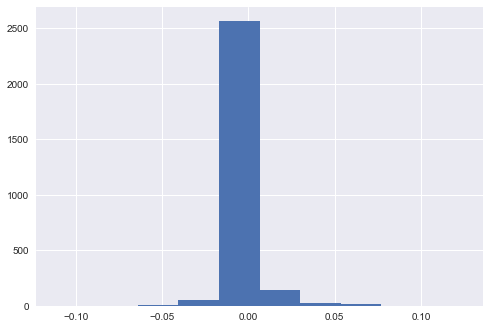

In [352]:
signal_return_1.hist()

In [353]:
expected_portfolio_returns_by_date = signal_return_1

In [371]:
expected_portfolio_returns_by_date = signal_return_1
portfolio_ret_mean = expected_portfolio_returns_by_date.mean()
portfolio_ret_ste = expected_portfolio_returns_by_date.sem()
portfolio_ret_annual_rate = (np.exp(portfolio_ret_mean *252)-1)*100

print("""
Mean:                       {:.6f}
Standard Error:             {:.6f}
Annualized Rate of Return:  {:.2f}%
""".format(portfolio_ret_mean, portfolio_ret_ste, portfolio_ret_annual_rate))


Mean:                       0.000640
Standard Error:             0.000179
Annualized Rate of Return:  17.51%



In [372]:
signal_return_1.describe()

count    2814.000000
mean        0.000640
std         0.009472
min        -0.111213
25%         0.000000
50%         0.000000
75%         0.000000
max         0.124088
dtype: float64

In [373]:
type(signal_return_1), signal_return_1[:5].values

(pandas.core.series.Series, array([ 0., -0.,  0.,  0., -0.]))

# T-test

In [374]:
from scipy import stats

def analyze_alpha(expected_portfolio_returns_by_date):
    t_test = stats.ttest_1samp(expected_portfolio_returns_by_date, 0)
    t_value = t_test[0]
    p_value = t_test[1] / 2

    return t_value, p_value

In [375]:
t_value, p_value = analyze_alpha(signal_return_1.dropna())

In [376]:
print("T-test t-value and p-value: {}, {}".format(t_value, p_value))

T-test t-value and p-value: 3.5860365504720044, 0.00017072853623706686
